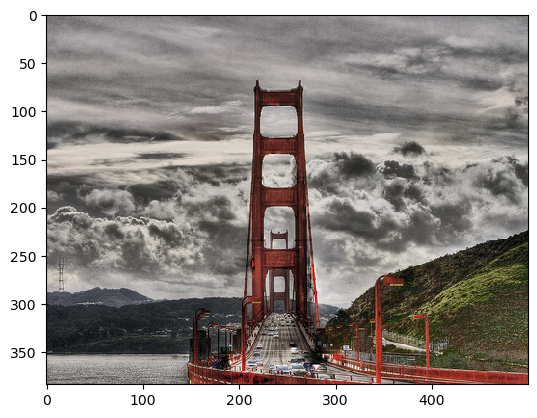

[[ 0.25  0.   -0.25]
 [ 0.5   0.   -0.5 ]
 [ 0.25  0.   -0.25]]


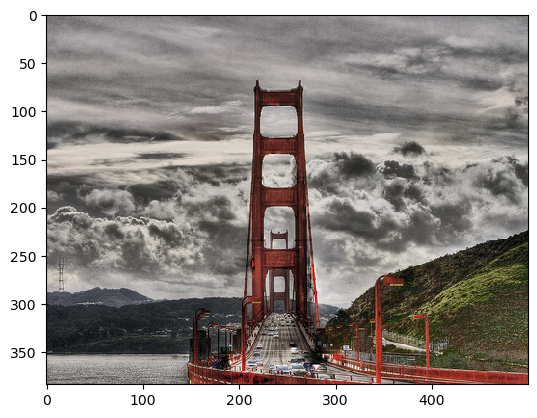

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


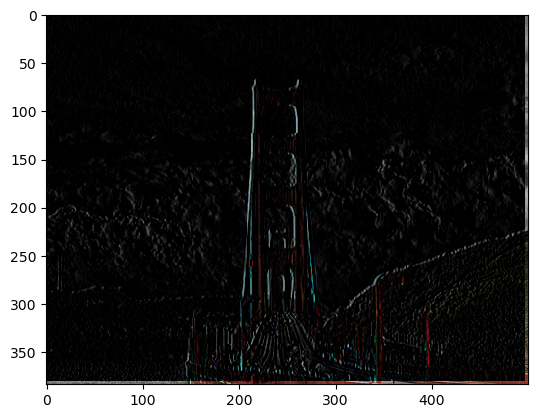

In [78]:
import cv2
import numpy as np
import sys
import pandas as pd 
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

img = mpimg.imread("CloudyGoldenGate.jpg")
plt.imshow(img, interpolation='nearest')
plt.show()

 
# sigma(standard deviation) and muu(mean) are the parameters of gaussian
 

def gaussian_filter(kernel_size, sigma=1, muu=0):
    x, y = np.meshgrid(np.linspace(-1, 1, kernel_size),
                       np.linspace(-1, 1, kernel_size))
    dst = np.sqrt(x**2+y**2)
 
    # lower normal part of gaussian
    normal = 1/(2* np.pi * sigma**2)
 
    # Calculating Gaussian filter
    gauss = np.exp(-((dst-muu)**2 / (2.0 * sigma**2))) * normal
    return gauss
    
kernel_size=3

def create_batch(i,j, filter_size):
    batch = img[i:i+filter_size, j:j+filter_size]
    return batch

y = img.shape[0]
x = img.shape[1]
new = np.zeros(img.shape)

filter_size = 3
filter = np.ones((filter_size,filter_size))/9

filter = np.array([[0.25, 0, -0.25], [0.5,0,-0.5], [0.25, 0, -0.25]])

#filter = gaussian_filter(kernel_size)    
print(filter)

filter = np.reshape(filter, (9,1))
duplicate = filter
filter = np.append(filter, duplicate, axis = 1)
filter = np.append(filter, duplicate, axis = 1)

for i in range(y): 
    for j in range(x):
        if (j < x-3) & (i < y-3): #if x value not at the very end
            batch = create_batch(i,j, filter_size)
            batch = np.reshape(batch, (9,3))
            sum = np.sum(np.multiply(filter, batch), axis = 0)
            new[i][j] = sum
        else: 
            new[i][j] = 8/9*img[i][j]

new = (np.rint(new)).astype(int)

plt.imshow(img, interpolation='nearest')
plt.show()
plt.imshow(new, interpolation='nearest')
plt.show()



